##  2022 as base year

## 1. Apartments

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

------------------------------------------------- 
Median Apartment prices by quarter - 2022:
 quarter
1    210000000.0
2    290000000.0
3     30000000.0
4     90000000.0
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Apartments' Mean of Median Prices: 155000000.0 
------------------------------------------------- 

------------------------------------------------- 
 Apartment Index Price for each quarter:
 quarter
1   1.3548
2   1.8710
3   0.1935
4   0.5806 
------------------------------------------------- 

------------------------------------------------- 
 Median Price of Apartment for Sale in 2022: 290000000 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices of Apartments in Kigali City - 2022: 13493247750 
------------------------------------------------- 

------------------------------------------------- 
 Number of Apartment

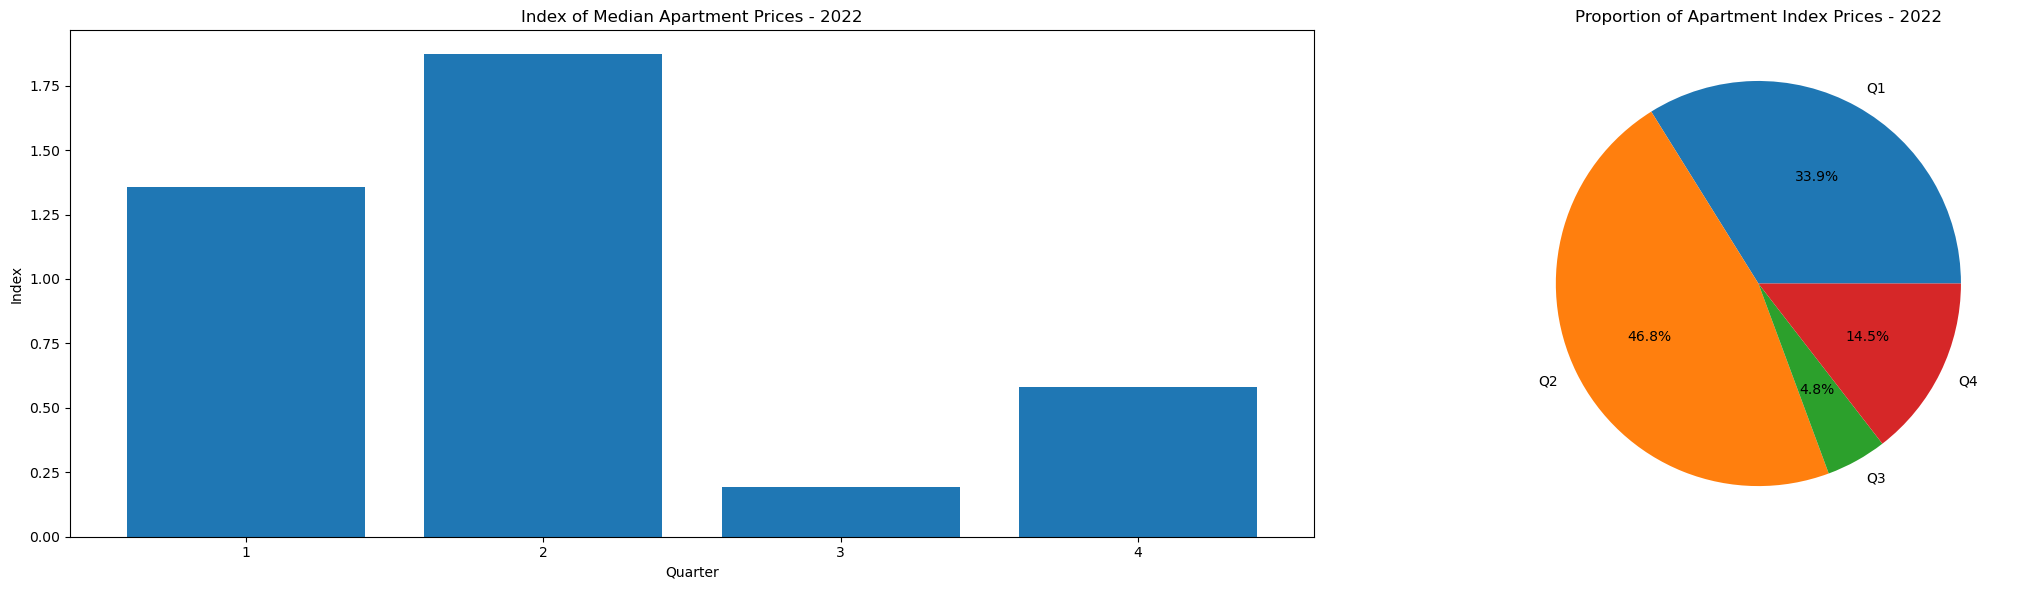

In [33]:
df_apart = pd.read_csv("apartment-for-sale.csv")
# Data preprocessing
df_apart['district'] = df_apart['district'].str.lower().str.strip()
# Drop rows with missing values in the 'date' column
df_apart = df_apart.dropna(subset=['date'])
# Convert the 'date' column to a proper datetime format
df_apart['date'] = pd.to_datetime(df_apart['date'])
# Extracting the quarter from the 'date' column and creating a new 'quarter' column
df_apart['quarter'] = df_apart['date'].dt.quarter
desired_districts = ['gasabo', 'kicukiro', 'nyarugenge']
df_apart_2022 = df_apart[(df_apart['district'].isin(desired_districts)) & (df_apart['date'].dt.year == 2022)].copy()
# Computing the median price of houses for sale in 2022 by quarter
median_apart_prices_by_quarter = df_apart_2022.groupby('quarter')['price'].median()
print("-"*49, "\nMedian Apartment prices by quarter - 2022:\n",median_apart_prices_by_quarter,"\n" + "-"*49, "\n")

apart_mean_median_price = median_apart_prices_by_quarter.mean()
print("-"*49, "\n Apartments' Mean of Median Prices:", apart_mean_median_price,
      "\n" + "-"*49, "\n")

# Step 3: Computing the index for each quarter
apart_index_by_quarter = median_apart_prices_by_quarter / apart_mean_median_price
print("-"*49, "\n Apartment Index Price for each quarter:\n", apart_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")

# Compute the median price of houses for sale in 2022
median_apart_price_2022 = df_apart_2022['price'].median()
print("-"*49, "\n Median Price of Apartment for Sale in 2022:", round(median_apart_price_2022),"\n" + "-"*49, "\n")

sum_prices_apart = df_apart_2022['price'].sum()
print("-"*49, "\n Sum of prices of Apartments in Kigali City - 2022:", sum_prices_apart, 
      "\n" + "-"*49, "\n")

number_of_apartments = len(df_apart_2022) - 1
print("-"*49, "\n Number of Apartments for sale in 2022:", number_of_apartments,"\n" + "-"*49, "\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Bar plot for the indices of median prices - 2022
ax1.bar(apart_index_by_quarter.index, apart_index_by_quarter.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Index')
ax1.set_title('Index of Median Apartment Prices - 2022')
ax1.set_xticks([1, 2, 3, 4])

# Pie chart to visualize the proportion of median prices for each quarter
ax2.pie(apart_index_by_quarter.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax2.set_title('Proportion of Apartment Index Prices - 2022')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### i) Gasabo

------------------------------------------------- 
 Number of Apartments in Gasabo district - 2022: 33 
------------------------------------------------- 

------------------------------------------------- 
 2022 Median prices for each quarter in Gasabo: 
 quarter
1     85250000.0
2    450000000.0
3     30000000.0
4     90000000.0
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Mean of Median Prices in Gasabo: 163812500.0 
------------------------------------------------- 

------------------------------------------------- 
 Index for each quarter in Gasabo:
 quarter
1   0.5204
2   2.7470
3   0.1831
4   0.5494 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices in Gasabo district - 2022: 8708747750 
------------------------------------------------- 



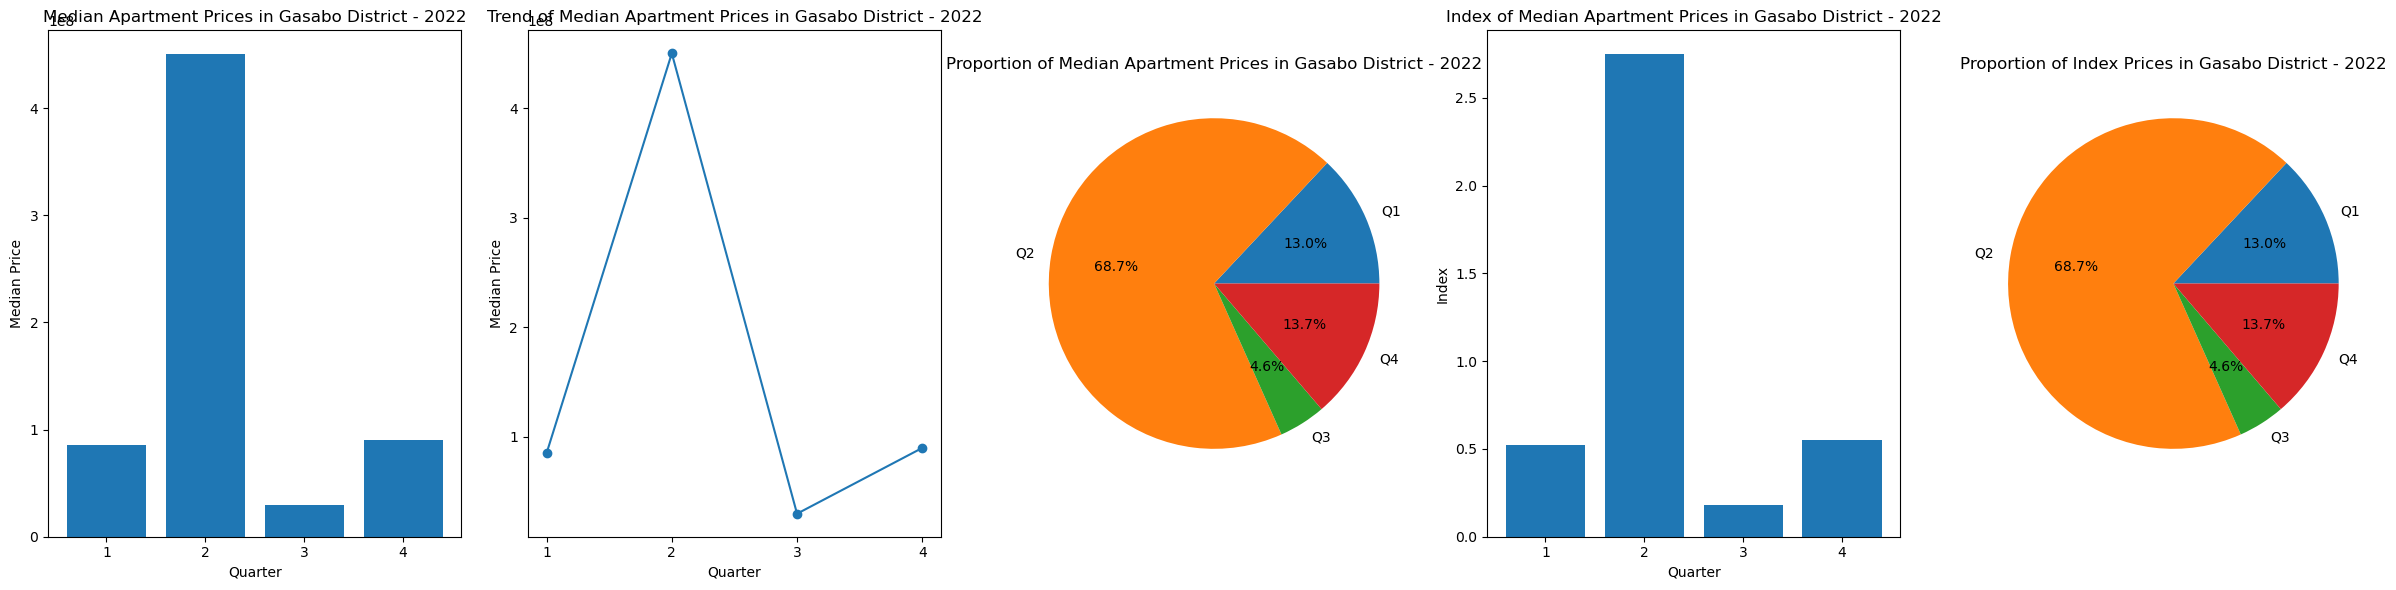

In [34]:
# Filter the data for Gasabo district in the year 2022
filtered_gasabo = df_apart_2022[(df_apart_2022['district'] == 'gasabo') & (df_apart_2022['date'].dt.year == 2022)].copy()

# Extracting the quarter from the 'date' column and creating a new 'quarter' column
filtered_gasabo['quarter'] = filtered_gasabo['date'].dt.quarter

# Computing the number of houses in Gasabo
num_apart_gasabo = len(filtered_gasabo)
print("-" * 49, "\n Number of Apartments in Gasabo district - 2022:", num_apart_gasabo,
      "\n" + "-" * 49, "\n")

# Step 1: Computing the median prices for each quarter
# gasabo_quarters_median_prices = filtered_gasabo.groupby('quarter')['price'].median().astype(int)
gasabo_quarters_median_prices = filtered_gasabo.groupby('quarter')['price'].median()
# If there are quarters without houses, set the median price to 0
quarters_without_houses = set([1, 2, 3, 4]) - set(gasabo_quarters_median_prices.index)
for quarter in quarters_without_houses:
    gasabo_quarters_median_prices.loc[quarter] = 0
gasabo_quarters_median_prices = gasabo_quarters_median_prices.sort_index()
print("-"*49, "\n 2022 Median prices for each quarter in Gasabo: \n", gasabo_quarters_median_prices, 
      "\n" + "-"*49, "\n")

# Step 2: Computing the mean of the median prices
gasabo_mean_median_price = gasabo_quarters_median_prices.mean()
print("-"*49, "\n Mean of Median Prices in Gasabo:", gasabo_mean_median_price,
      "\n" + "-"*49, "\n")

# Step 3: Computing the index for each quarter
gasabo_index_by_quarter = gasabo_quarters_median_prices / gasabo_mean_median_price
print("-"*49, "\n Index for each quarter in Gasabo:\n", gasabo_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")

# Step 4: Compute the sum of prices for houses in Gasabo
sum_prices_gasabo = filtered_gasabo['price'].sum()
print("-"*49, "\n Sum of prices in Gasabo district - 2022:", sum_prices_gasabo, 
      "\n" + "-"*49, "\n")


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 6))

# Plotting the median prices on a bar chart
ax1.bar(gasabo_quarters_median_prices.index, gasabo_quarters_median_prices.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Median Price')
ax1.set_title('Median Apartment Prices in Gasabo District - 2022')
ax1.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Line graph for median prices in Gasabo district - 2022
ax2.plot(gasabo_quarters_median_prices.index, gasabo_quarters_median_prices.values, marker='o')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Median Price')
ax2.set_title('Trend of Median Apartment Prices in Gasabo District - 2022')
ax2.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Pie chart to visualize the proportion of median prices for each quarter
ax3.pie(gasabo_quarters_median_prices.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax3.set_title('Proportion of Median Apartment Prices in Gasabo District - 2022')

# Bar plot for the indices of median prices in Gasabo district - 2022
ax4.bar(gasabo_index_by_quarter.index, gasabo_index_by_quarter.values)
ax4.set_xlabel('Quarter')
ax4.set_ylabel('Index')
ax4.set_title('Index of Median Apartment Prices in Gasabo District - 2022')
ax4.set_xticks([1, 2, 3, 4])

# Pie chart to visualize the proportion of median prices for each quarter
ax5.pie(gasabo_index_by_quarter.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax5.set_title('Proportion of Index Prices in Gasabo District - 2022')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### ii) Kicukiro

------------------------------------------------- 
 Number of Apartments in Kicukiro district - 2022: 11 
------------------------------------------------- 

------------------------------------------------- 
 2022 Median prices for each quarter in Kicukiro: 
 quarter
1    210000000.0
2    210000000.0
3            0.0
4            0.0
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Mean of Median Prices in Kicukiro: 105000000.0 
------------------------------------------------- 

------------------------------------------------- 
 Index for each quarter in Kicukiro:
 quarter
1   2.0000
2   2.0000
3   0.0000
4   0.0000 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices in Kicukiro district - 2022: 2464500000 
-------------------------------------------------


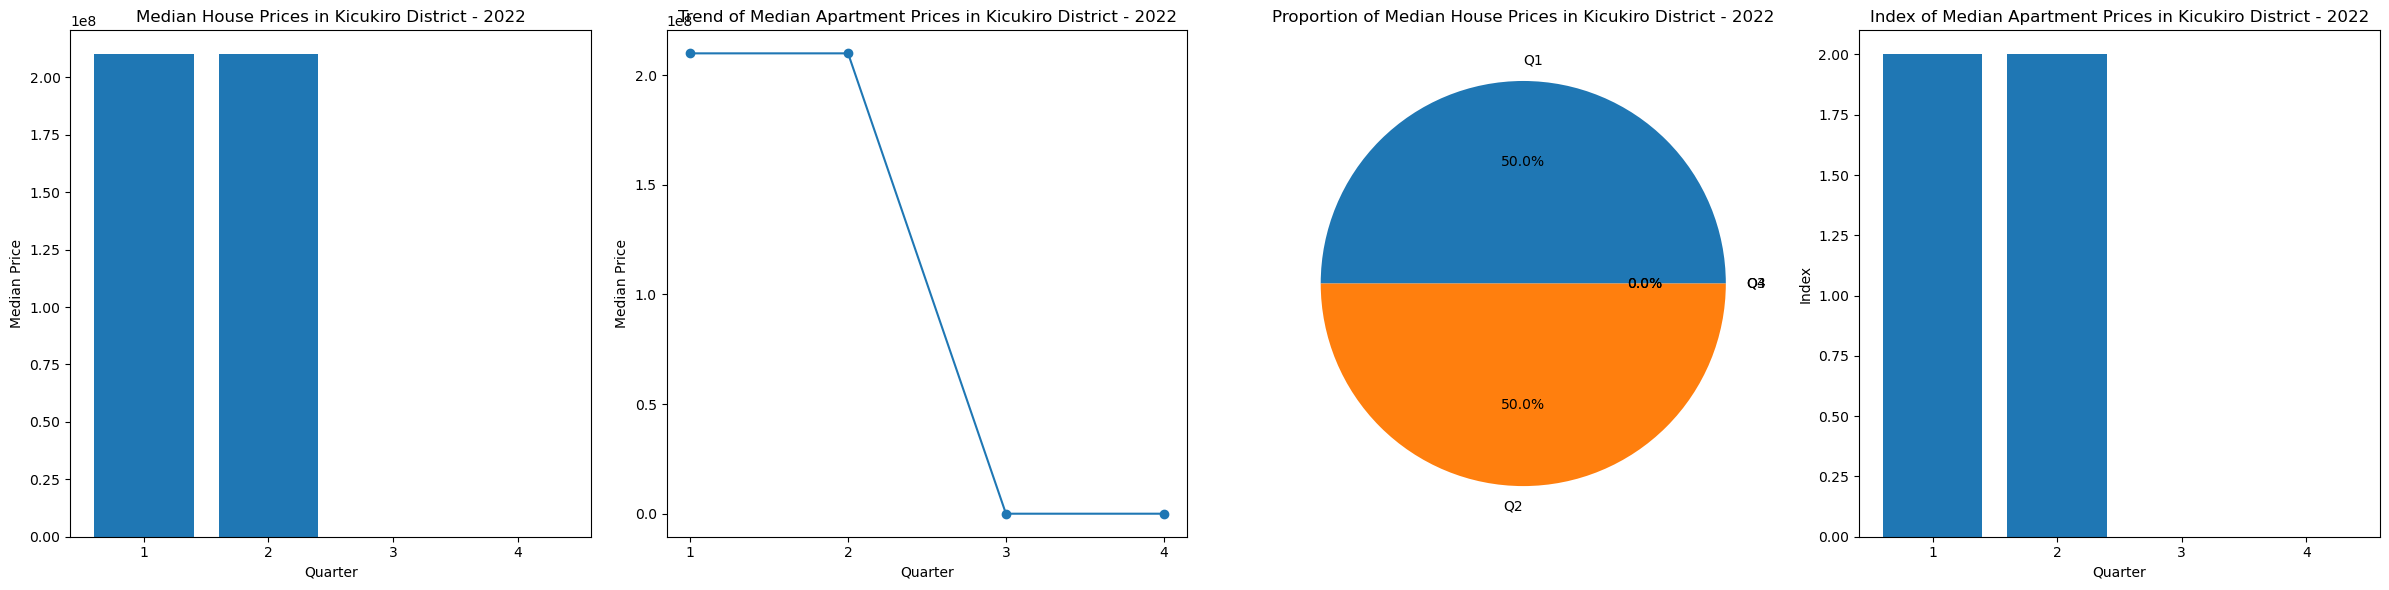

In [35]:
# Filter the data for Nyarugenge district in the year 2022
# filtered_kicukiro = df_house[df_house['district'].str.contains('Kicukiro') & df_house['date'].str.contains('2022')].copy()
filtered_kicukiro = df_apart_2022[(df_apart_2022['district'] == 'kicukiro') & (df_apart_2022['date'].dt.year == 2022)].copy()

# Extracting the quarter from the 'date' column and creating a new 'quarter' column
filtered_kicukiro['quarter'] = filtered_kicukiro['date'].dt.quarter

# Computing the number of houses in Kicukiro
num_apart_kicukiro = len(filtered_kicukiro)
print("-" * 49, "\n Number of Apartments in Kicukiro district - 2022:", num_apart_kicukiro,
      "\n" + "-" * 49, "\n")

# Step 1: Computing the median prices for each quarter
# kicukiro_quarters_median_prices = filtered_kicukiro.groupby('quarter')['price'].median().astype(int)
kicukiro_quarters_median_prices = filtered_kicukiro.groupby('quarter')['price'].median()
# If there are quarters without houses, set the median price to 0
quarters_without_houses = set([1, 2, 3, 4]) - set(kicukiro_quarters_median_prices.index)
for quarter in quarters_without_houses:
    kicukiro_quarters_median_prices.loc[quarter] = 0
kicukiro_quarters_median_prices = kicukiro_quarters_median_prices.sort_index()
print("-"*49, "\n 2022 Median prices for each quarter in Kicukiro: \n", kicukiro_quarters_median_prices, 
      "\n" + "-"*49, "\n")

# Step 2: Computing the mean of the median prices
kicukiro_mean_median_price = kicukiro_quarters_median_prices.mean()
print("-"*49, "\n Mean of Median Prices in Kicukiro:", kicukiro_mean_median_price,
      "\n" + "-"*49, "\n")

# Step 3: Computing the index for each quarter
kicukiro_index_by_quarter = kicukiro_quarters_median_prices / kicukiro_mean_median_price
print("-"*49, "\n Index for each quarter in Kicukiro:\n", kicukiro_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")

# Step 4: Compute the sum of prices for houses in Kicukiro
sum_prices_kicukiro = filtered_kicukiro['price'].sum()
print("-"*49, "\n Sum of prices in Kicukiro district - 2022:", sum_prices_kicukiro, 
      "\n" + "-"*49)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

# Plotting the median prices on a bar chart
ax1.bar(kicukiro_quarters_median_prices.index, kicukiro_quarters_median_prices.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Median Price')
ax1.set_title('Median House Prices in Kicukiro District - 2022')
ax1.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Line graph for median prices in Kicukiro district - 2022
ax2.plot(kicukiro_quarters_median_prices.index, kicukiro_quarters_median_prices.values, marker='o')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Median Price')
ax2.set_title('Trend of Median Apartment Prices in Kicukiro District - 2022')
ax2.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Pie chart to visualize the proportion of median prices for each quarter
ax3.pie(kicukiro_quarters_median_prices.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax3.set_title('Proportion of Median House Prices in Kicukiro District - 2022')

# Bar plot for the indices of median prices in Kicukiro district - 2022
ax4.bar(kicukiro_index_by_quarter.index, kicukiro_index_by_quarter.values)
ax4.set_xlabel('Quarter')
ax4.set_ylabel('Index')
ax4.set_title('Index of Median Apartment Prices in Kicukiro District - 2022')
ax4.set_xticks([1, 2, 3, 4])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### iii) Nyarugenge

------------------------------------------------- 
 Number of Apartments in Nyarugenge district - 2022: 8 
------------------------------------------------- 

------------------------------------------------- 
 2022 Median prices for each quarter in Nyarugenge: 
 quarter
1            0.0
2    290000000.0
3            0.0
4            0.0
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Mean of Median Prices in Nyarugenge: 72500000.0 
------------------------------------------------- 

------------------------------------------------- 
 Index for each quarter in Nyarugenge:
 quarter
1   0.0000
2   4.0000
3   0.0000
4   0.0000 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices in Nyarugenge district - 2022: 2320000000 
------------------------------------------------- 



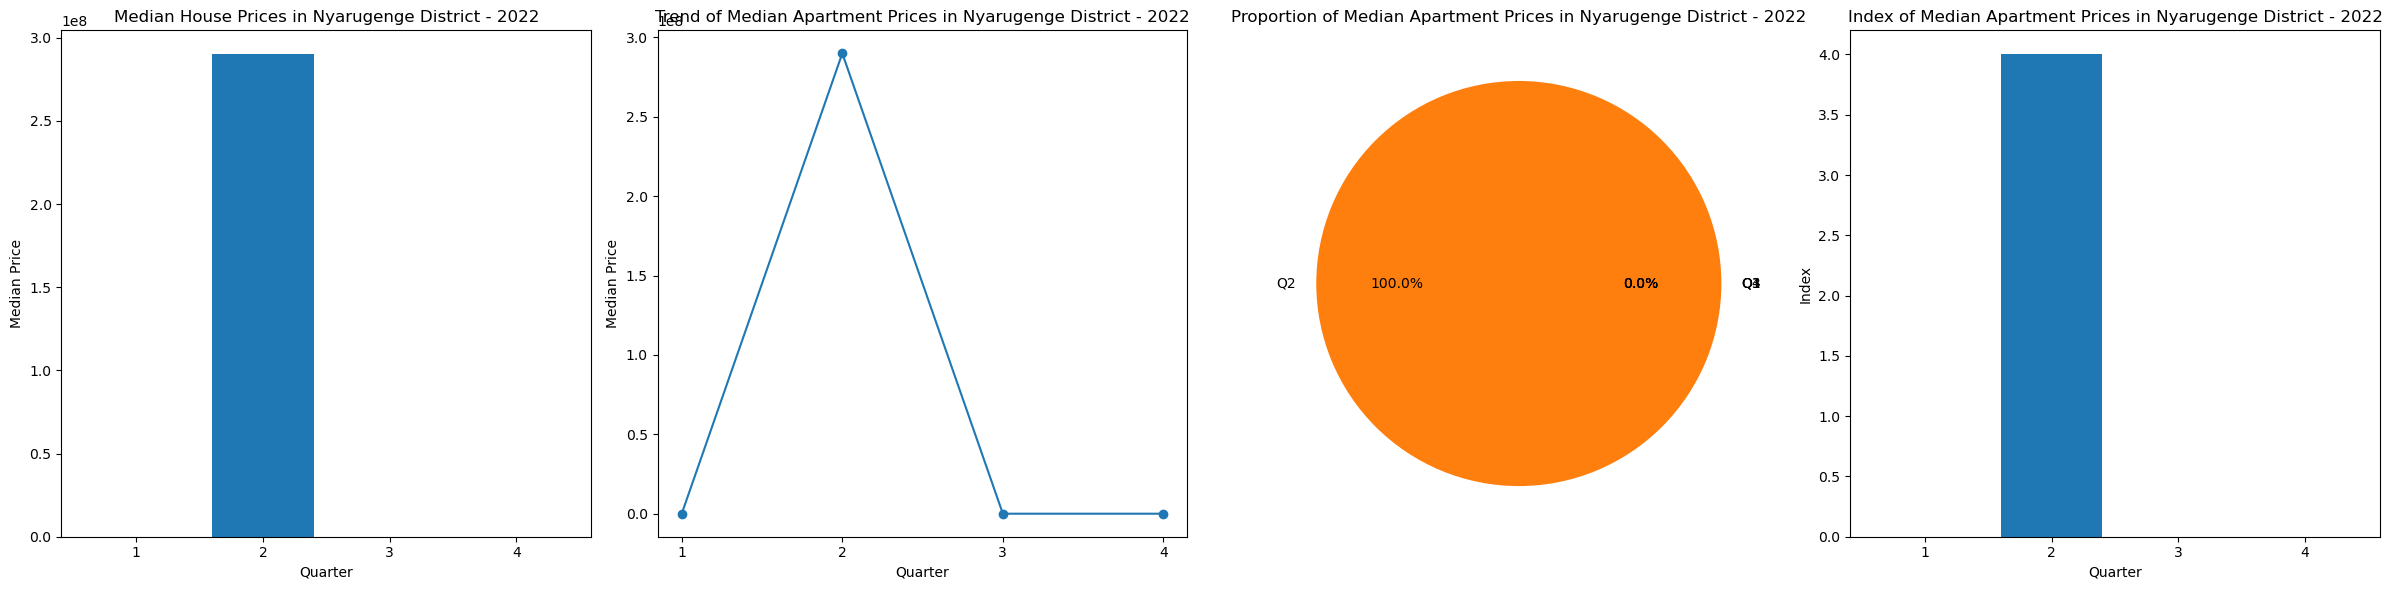

In [46]:
filtered_nyarugenge = df_apart_2022[(df_apart_2022['district'] == 'nyarugenge') & (df_apart_2022['date'].dt.year == 2022)].copy()

# Extracting the quarter from the 'date' column and creating a new 'quarter' column
filtered_nyarugenge['quarter'] = filtered_nyarugenge['date'].dt.quarter

# Computing the number of houses in Nyarugenge
num_apart_nyarugenge = len(filtered_nyarugenge)
print("-" * 49, "\n Number of Apartments in Nyarugenge district - 2022:", num_apart_nyarugenge,
      "\n" + "-" * 49, "\n")


# Step 1: Computing the median prices for each quarter
nyarugenge_quarters_median_prices = filtered_nyarugenge.groupby('quarter')['price'].median()
# If there are quarters without houses, set the median price to 0
quarters_without_houses = set([1, 2, 3, 4]) - set(nyarugenge_quarters_median_prices.index)
for quarter in quarters_without_houses:
    nyarugenge_quarters_median_prices.loc[quarter] = 0
nyarugenge_quarters_median_prices = nyarugenge_quarters_median_prices.sort_index()
print("-"*49, "\n 2022 Median prices for each quarter in Nyarugenge: \n", nyarugenge_quarters_median_prices, 
      "\n" + "-"*49, "\n")

# Step 2: Computing the mean of the median prices
nyarugenge_mean_median_price = nyarugenge_quarters_median_prices.mean()
print("-"*49, "\n Mean of Median Prices in Nyarugenge:", nyarugenge_mean_median_price,
      "\n" + "-"*49, "\n")

# Step 3: Computing the index for each quarter
nyarugenge_index_by_quarter = nyarugenge_quarters_median_prices / nyarugenge_mean_median_price
print("-"*49, "\n Index for each quarter in Nyarugenge:\n", nyarugenge_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")

# Step 4: Compute the sum of prices for houses in Nyarugenge
sum_prices_nyarugenge = filtered_nyarugenge['price'].sum()
print("-"*49, "\n Sum of prices in Nyarugenge district - 2022:", sum_prices_nyarugenge, 
      "\n" + "-"*49, "\n")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

# Plotting the median prices on a bar chart
ax1.bar(nyarugenge_quarters_median_prices.index, nyarugenge_quarters_median_prices.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Median Price')
ax1.set_title('Median House Prices in Nyarugenge District - 2022')
ax1.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Line graph for median prices in Nyarugenge district - 2022
ax2.plot(nyarugenge_quarters_median_prices.index, nyarugenge_quarters_median_prices.values, marker='o')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Median Price')
ax2.set_title('Trend of Median Apartment Prices in Nyarugenge District - 2022')
ax2.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Pie chart to visualize the proportion of median prices for each quarter
ax3.pie(nyarugenge_quarters_median_prices.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax3.set_title('Proportion of Median Apartment Prices in Nyarugenge District - 2022')

# Bar plot for the indices of median prices in Nyarugenge district - 2022
ax4.bar(nyarugenge_index_by_quarter.index, nyarugenge_index_by_quarter.values)
ax4.set_xlabel('Quarter')
ax4.set_ylabel('Index')
ax4.set_title('Index of Median Apartment Prices in Nyarugenge District - 2022')
ax4.set_xticks([1, 2, 3, 4])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

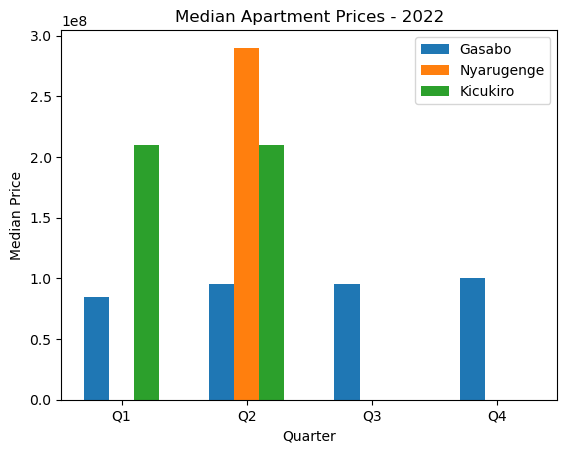

In [47]:
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.2

# Plotting the median prices for each district on the same axes
ax.bar(gasabo_quarters_median_prices.index, gasabo_quarters_median_prices.values, width=bar_width, label='Gasabo')
ax.bar(nyarugenge_quarters_median_prices.index + bar_width, nyarugenge_quarters_median_prices.values, width=bar_width, label='Nyarugenge')
ax.bar(kicukiro_quarters_median_prices.index + 2*bar_width, kicukiro_quarters_median_prices.values, width=bar_width, label='Kicukiro')

# Set labels, title, and ticks
ax.set_xlabel('Quarter')
ax.set_ylabel('Median Price')
ax.set_title('Median Apartment Prices - 2022')
ax.set_xticks(gasabo_quarters_median_prices.index + bar_width)
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

# Add a legend to differentiate the districts
ax.legend()

# Show the combined bar chart
plt.show()

### 2. Houses

In [37]:
df_house = pd.read_csv("house_for_sale.csv")
for idx, price in enumerate(df_house['price']):
    if price < 20000000:
        df_house.at[idx, 'price'] = 20000000
indices_to_remove = []
for idx, price in enumerate(df_house['price']):
    if price > 12000000000:
        indices_to_remove.append(idx)

df_house = df_house.drop(indices_to_remove)

------------------------------------------------- 
Median House prices by quarter - 2022:
 quarter
1    65000000.0
2    75000000.0
3    72000000.0
4    75000000.0
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Houses' Mean of Median Prices: 71750000.0 
------------------------------------------------- 

------------------------------------------------- 
 Apartment Index Price for each quarter:
 quarter
1   0.9059
2   1.0453
3   1.0035
4   1.0453 
------------------------------------------------- 

------------------------------------------------- 
 Median Price of Houses for Sale in 2022: 72000000 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices of Houses in Kigali City - 2022: 678533889906 
------------------------------------------------- 

------------------------------------------------- 
 Number of Houses for sale in 2022: 6679

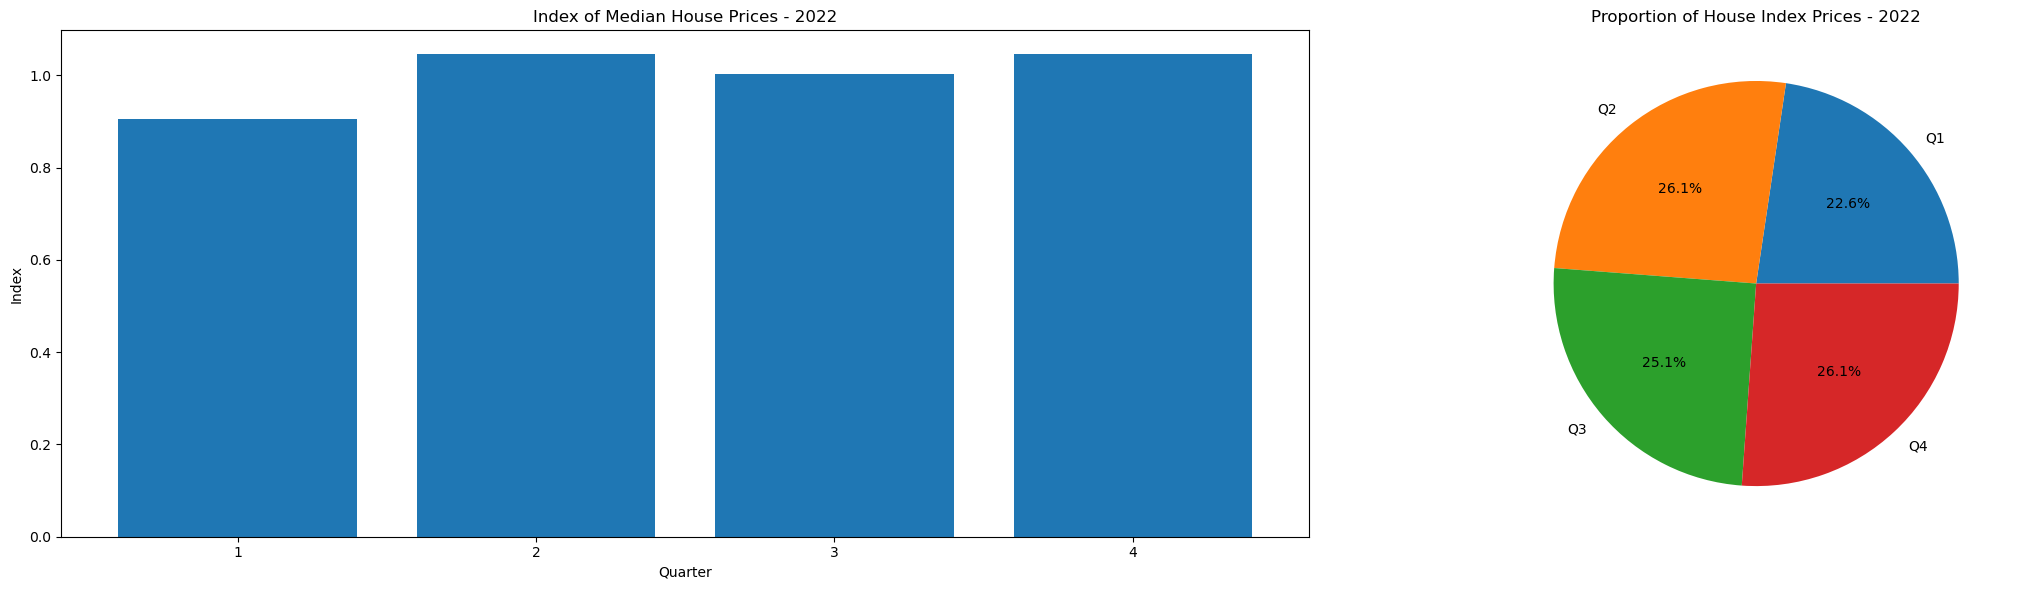

In [38]:
df_house['district'] = df_house['district'].str.lower().str.strip()
# Drop rows with missing values in the 'date' column
df_house = df_house.dropna(subset=['date'])
# Convert the 'date' column to a proper datetime format
df_house['date'] = pd.to_datetime(df_house['date'])
# Extracting the quarter from the 'date' column and creating a new 'quarter' column
df_house['quarter'] = df_house['date'].dt.quarter
desired_districts = ['gasabo', 'kicukiro', 'nyarugenge']
df_house_2022 = df_house[(df_house['district'].isin(desired_districts)) & (df_house['date'].dt.year == 2022)].copy()

# Computing the median price of houses for sale in 2022 by quarter
median_house_prices_by_quarter = df_house_2022.groupby('quarter')['price'].median()
print("-"*49, "\nMedian House prices by quarter - 2022:\n",median_house_prices_by_quarter,"\n" + "-"*49, "\n")

house_mean_median_price = median_house_prices_by_quarter.mean()
print("-"*49, "\n Houses' Mean of Median Prices:", house_mean_median_price,
      "\n" + "-"*49, "\n")

house_index_by_quarter = median_house_prices_by_quarter / house_mean_median_price
print("-"*49, "\n Apartment Index Price for each quarter:\n", house_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")
# Compute the median price of houses for sale in 2022
median_house_price_2022 = df_house_2022['price'].median()
print("-"*49, "\n Median Price of Houses for Sale in 2022:", round(median_house_price_2022),"\n" + "-"*49, "\n")

sum_prices_house = df_house_2022['price'].sum()
print("-"*49, "\n Sum of prices of Houses in Kigali City - 2022:", sum_prices_house, 
      "\n" + "-"*49, "\n")

number_of_houses = len(df_house_2022) - 1
print("-"*49, "\n Number of Houses for sale in 2022:", number_of_houses,"\n" + "-"*49, "\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
# Bar plot for the indices of median prices - 2022
ax1.bar(house_index_by_quarter.index, house_index_by_quarter.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Index')
ax1.set_title('Index of Median House Prices - 2022')
ax1.set_xticks([1, 2, 3, 4])

# Pie chart to visualize the proportion of median prices for each quarter
ax2.pie(house_index_by_quarter.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax2.set_title('Proportion of House Index Prices - 2022')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1. Gasabo

------------------------------------------------- 
 Number of houses in Gasabo district - 2022: 3437 
------------------------------------------------- 

------------------------------------------------- 
 2022 Median prices for each quarter in Gasabo: 
 quarter
1     85000000.0
2     95000000.0
3     95000000.0
4    100000000.0
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Mean of Median Prices in Gasabo: 93750000.0 
------------------------------------------------- 

------------------------------------------------- 
 Index for each quarter in Gasabo:
 quarter
1   0.9067
2   1.0133
3   1.0133
4   1.0667 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices in Gasabo district - 2022: 429795500000 
------------------------------------------------- 



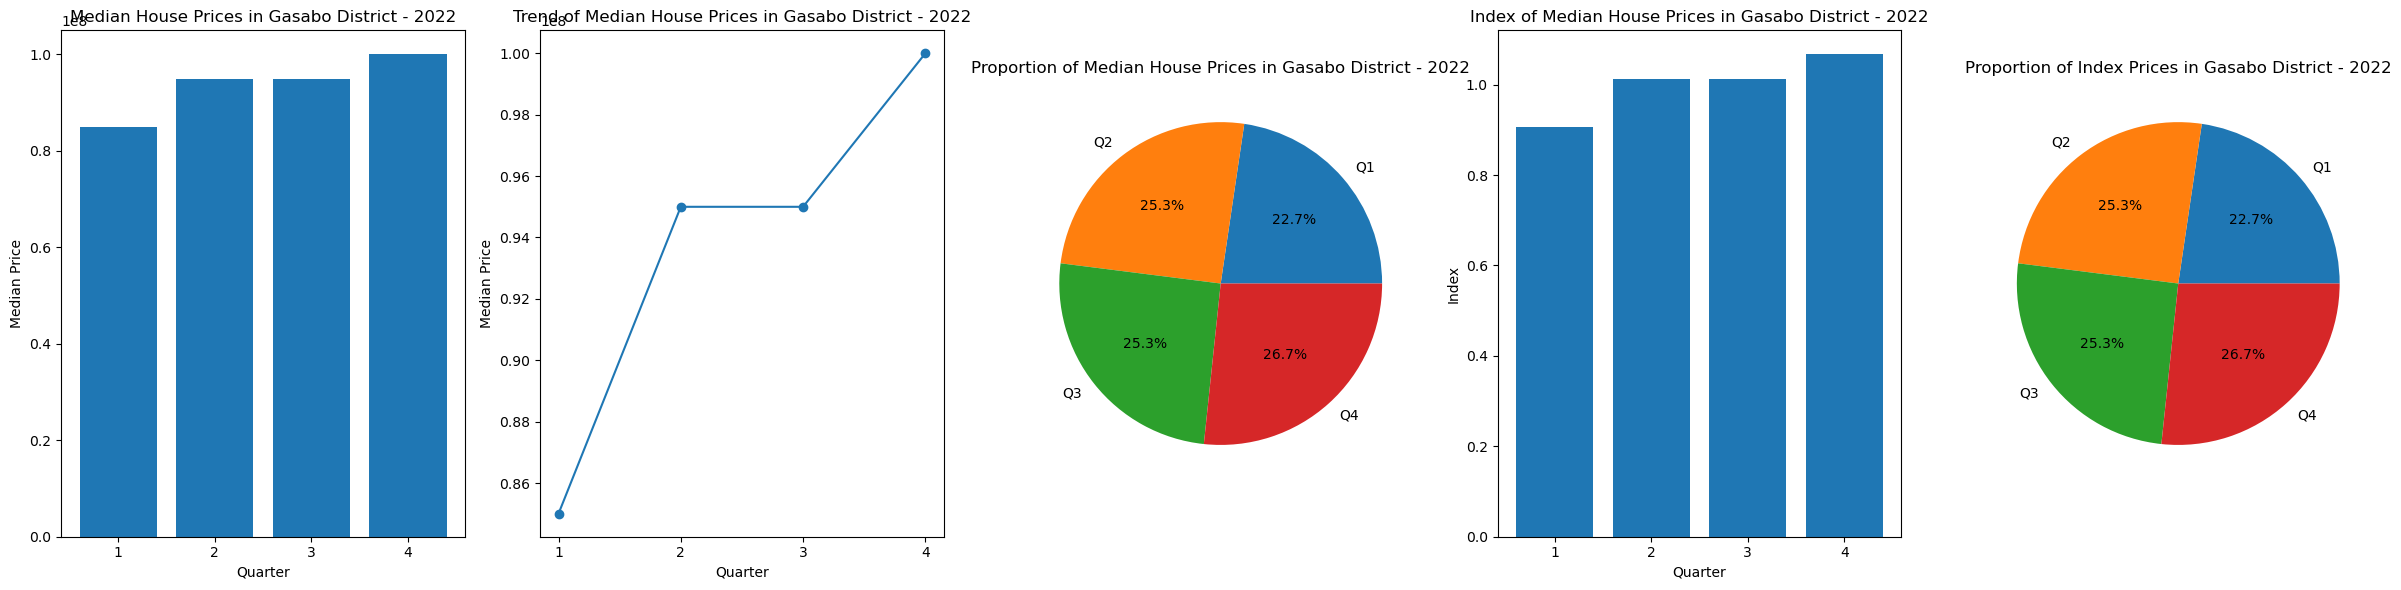

In [39]:
# Filter the data for Gasabo district in the year 2022
filtered_gasabo = df_house[(df_house['district'] == 'gasabo') & (df_house['date'].dt.year == 2022)].copy()

# Extracting the quarter from the 'date' column and creating a new 'quarter' column
filtered_gasabo['quarter'] = filtered_gasabo['date'].dt.quarter

# Computing the number of houses in Gasabo
num_houses_gasabo = len(filtered_gasabo)
print("-" * 49, "\n Number of houses in Gasabo district - 2022:", num_houses_gasabo,
      "\n" + "-" * 49, "\n")

# Step 1: Computing the median prices for each quarter
# gasabo_quarters_median_prices = filtered_gasabo.groupby('quarter')['price'].median().astype(int)
gasabo_quarters_median_prices = filtered_gasabo.groupby('quarter')['price'].median()
print("-"*49, "\n 2022 Median prices for each quarter in Gasabo: \n", gasabo_quarters_median_prices, 
      "\n" + "-"*49, "\n")

# Step 2: Computing the mean of the median prices
gasabo_mean_median_price = gasabo_quarters_median_prices.mean()
print("-"*49, "\n Mean of Median Prices in Gasabo:", gasabo_mean_median_price,
      "\n" + "-"*49, "\n")

# Step 3: Computing the index for each quarter
gasabo_index_by_quarter = gasabo_quarters_median_prices / gasabo_mean_median_price
print("-"*49, "\n Index for each quarter in Gasabo:\n", gasabo_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")

# Step 4: Compute the sum of prices for houses in Gasabo
sum_prices_gasabo = filtered_gasabo['price'].sum()
print("-"*49, "\n Sum of prices in Gasabo district - 2022:", sum_prices_gasabo, 
      "\n" + "-"*49, "\n")


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 6))

# Plotting the median prices on a bar chart
ax1.bar(gasabo_quarters_median_prices.index, gasabo_quarters_median_prices.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Median Price')
ax1.set_title('Median House Prices in Gasabo District - 2022')
ax1.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Line graph for median prices in Gasabo district - 2022
ax2.plot(gasabo_quarters_median_prices.index, gasabo_quarters_median_prices.values, marker='o')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Median Price')
ax2.set_title('Trend of Median House Prices in Gasabo District - 2022')
ax2.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Pie chart to visualize the proportion of median prices for each quarter
ax3.pie(gasabo_quarters_median_prices.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax3.set_title('Proportion of Median House Prices in Gasabo District - 2022')

# Bar plot for the indices of median prices in Gasabo district - 2022
ax4.bar(gasabo_index_by_quarter.index, gasabo_index_by_quarter.values)
ax4.set_xlabel('Quarter')
ax4.set_ylabel('Index')
ax4.set_title('Index of Median House Prices in Gasabo District - 2022')
ax4.set_xticks([1, 2, 3, 4])

# Pie chart to visualize the proportion of median prices for each quarter
ax5.pie(gasabo_index_by_quarter.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax5.set_title('Proportion of Index Prices in Gasabo District - 2022')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 2. Kicukiro

------------------------------------------------- 
 Number of houses in Kicukiro district - 2022: 3206 
------------------------------------------------- 

------------------------------------------------- 
 2022 Median prices for each quarter in Kicukiro: 
 quarter
1   60000000
2   65000000
3   65000000
4   68000000
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Mean of Median Prices in Kicukiro: 64500000.0 
------------------------------------------------- 

------------------------------------------------- 
 Index for each quarter in Kicukiro:
 quarter
1   0.9302
2   1.0078
3   1.0078
4   1.0543 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices in Kicukiro district - 2022: 240538389906 
-------------------------------------------------


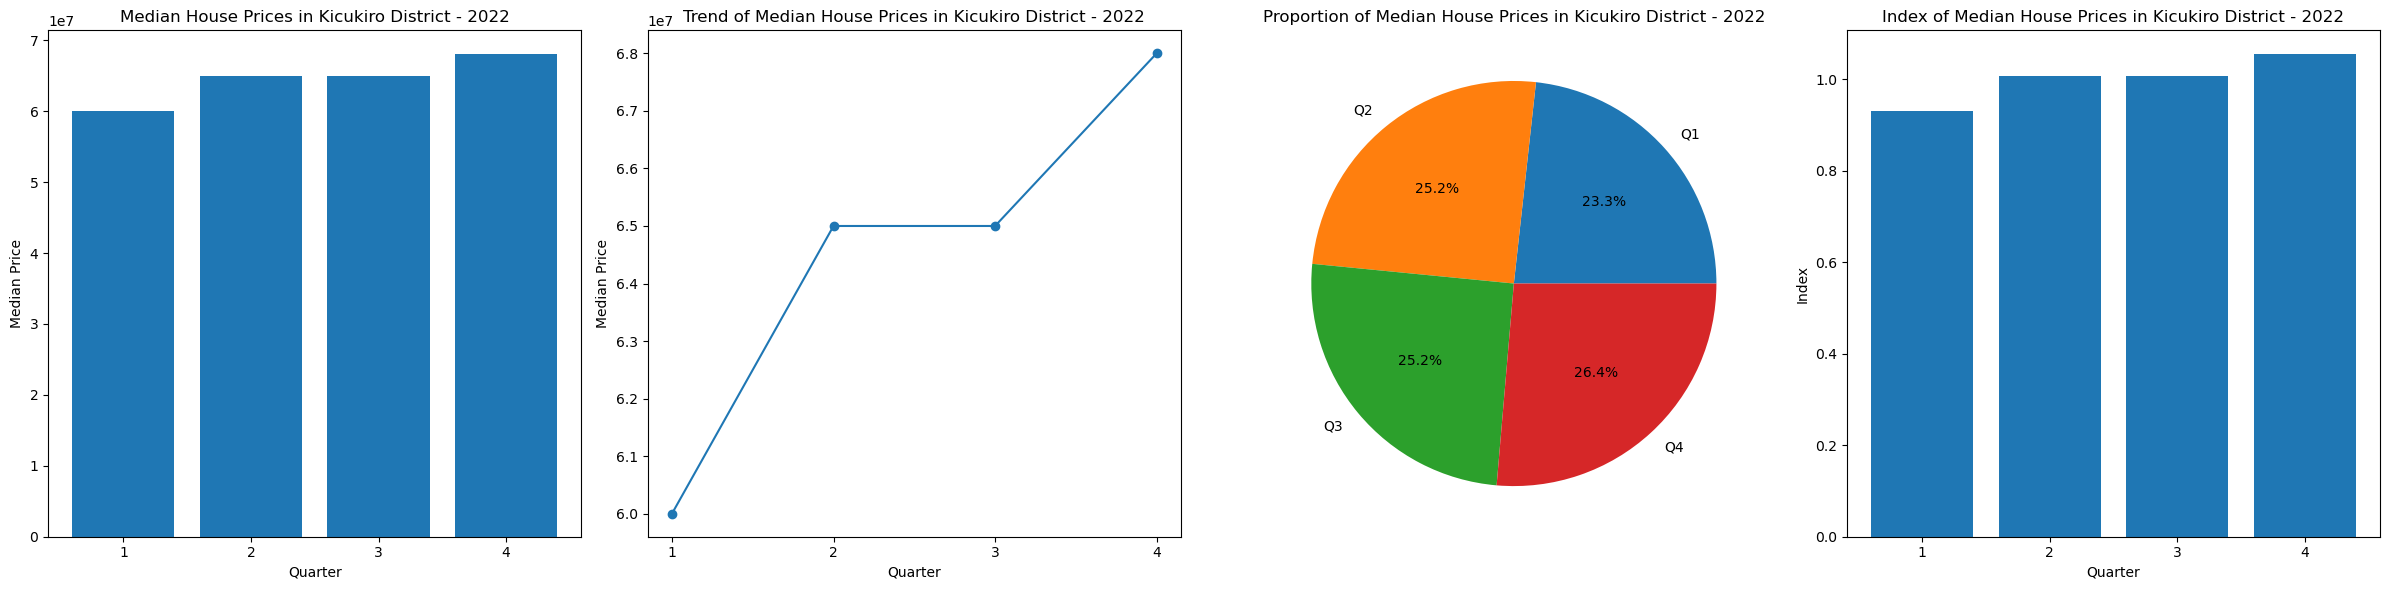

In [154]:
# Filter the data for Nyarugenge district in the year 2022
# filtered_kicukiro = df_house[df_house['district'].str.contains('Kicukiro') & df_house['date'].str.contains('2022')].copy()
filtered_kicukiro = df_house[(df_house['district'] == 'kicukiro') & (df_house['date'].dt.year == 2022)].copy()

# Extracting the quarter from the 'date' column and creating a new 'quarter' column
filtered_kicukiro['quarter'] = filtered_kicukiro['date'].dt.quarter

# Computing the number of houses in Nyarugenge
num_houses_kicukiro = len(filtered_kicukiro)
print("-" * 49, "\n Number of houses in Kicukiro district - 2022:", num_houses_kicukiro,
      "\n" + "-" * 49, "\n")

# Step 1: Computing the median prices for each quarter
# kicukiro_quarters_median_prices = filtered_kicukiro.groupby('quarter')['price'].median().astype(int)
kicukiro_quarters_median_prices = filtered_kicukiro.groupby('quarter')['price'].median()
print("-"*49, "\n 2022 Median prices for each quarter in Kicukiro: \n", kicukiro_quarters_median_prices, 
      "\n" + "-"*49, "\n")

# Step 2: Computing the mean of the median prices
kicukiro_mean_median_price = kicukiro_quarters_median_prices.mean()
print("-"*49, "\n Mean of Median Prices in Kicukiro:", kicukiro_mean_median_price,
      "\n" + "-"*49, "\n")

# Step 3: Computing the index for each quarter
kicukiro_index_by_quarter = kicukiro_quarters_median_prices / kicukiro_mean_median_price
print("-"*49, "\n Index for each quarter in Kicukiro:\n", kicukiro_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")

# Step 4: Compute the sum of prices for houses in Kicukiro
sum_prices_kicukiro = filtered_kicukiro['price'].sum()
print("-"*49, "\n Sum of prices in Kicukiro district - 2022:", sum_prices_kicukiro, 
      "\n" + "-"*49)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

# Plotting the median prices on a bar chart
ax1.bar(kicukiro_quarters_median_prices.index, kicukiro_quarters_median_prices.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Median Price')
ax1.set_title('Median House Prices in Kicukiro District - 2022')
ax1.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Line graph for median prices in Kicukiro district - 2022
ax2.plot(kicukiro_quarters_median_prices.index, kicukiro_quarters_median_prices.values, marker='o')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Median Price')
ax2.set_title('Trend of Median House Prices in Kicukiro District - 2022')
ax2.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Pie chart to visualize the proportion of median prices for each quarter
ax3.pie(kicukiro_quarters_median_prices.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax3.set_title('Proportion of Median House Prices in Kicukiro District - 2022')

# Bar plot for the indices of median prices in Kicukiro district - 2022
ax4.bar(kicukiro_index_by_quarter.index, kicukiro_index_by_quarter.values)
ax4.set_xlabel('Quarter')
ax4.set_ylabel('Index')
ax4.set_title('Index of Median House Prices in Kicukiro District - 2022')
ax4.set_xticks([1, 2, 3, 4])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 3. Nyarugenge

------------------------------------------------- 
 Number of houses in Nyarugenge district - 2022: 37 
------------------------------------------------- 

------------------------------------------------- 
 2022 Median prices for each quarter in Nyarugenge: 
 quarter
1    55000000
2   155000000
3    50000000
4   217500000
Name: price, dtype: float64 
------------------------------------------------- 

------------------------------------------------- 
 Mean of Median Prices in Nyarugenge: 119375000.0 
------------------------------------------------- 

------------------------------------------------- 
 Index for each quarter in Nyarugenge:
 quarter
1   0.4607
2   1.2984
3   0.4188
4   1.8220 
------------------------------------------------- 

------------------------------------------------- 
 Sum of prices in Nyarugenge district - 2022: 8200000000 
------------------------------------------------- 



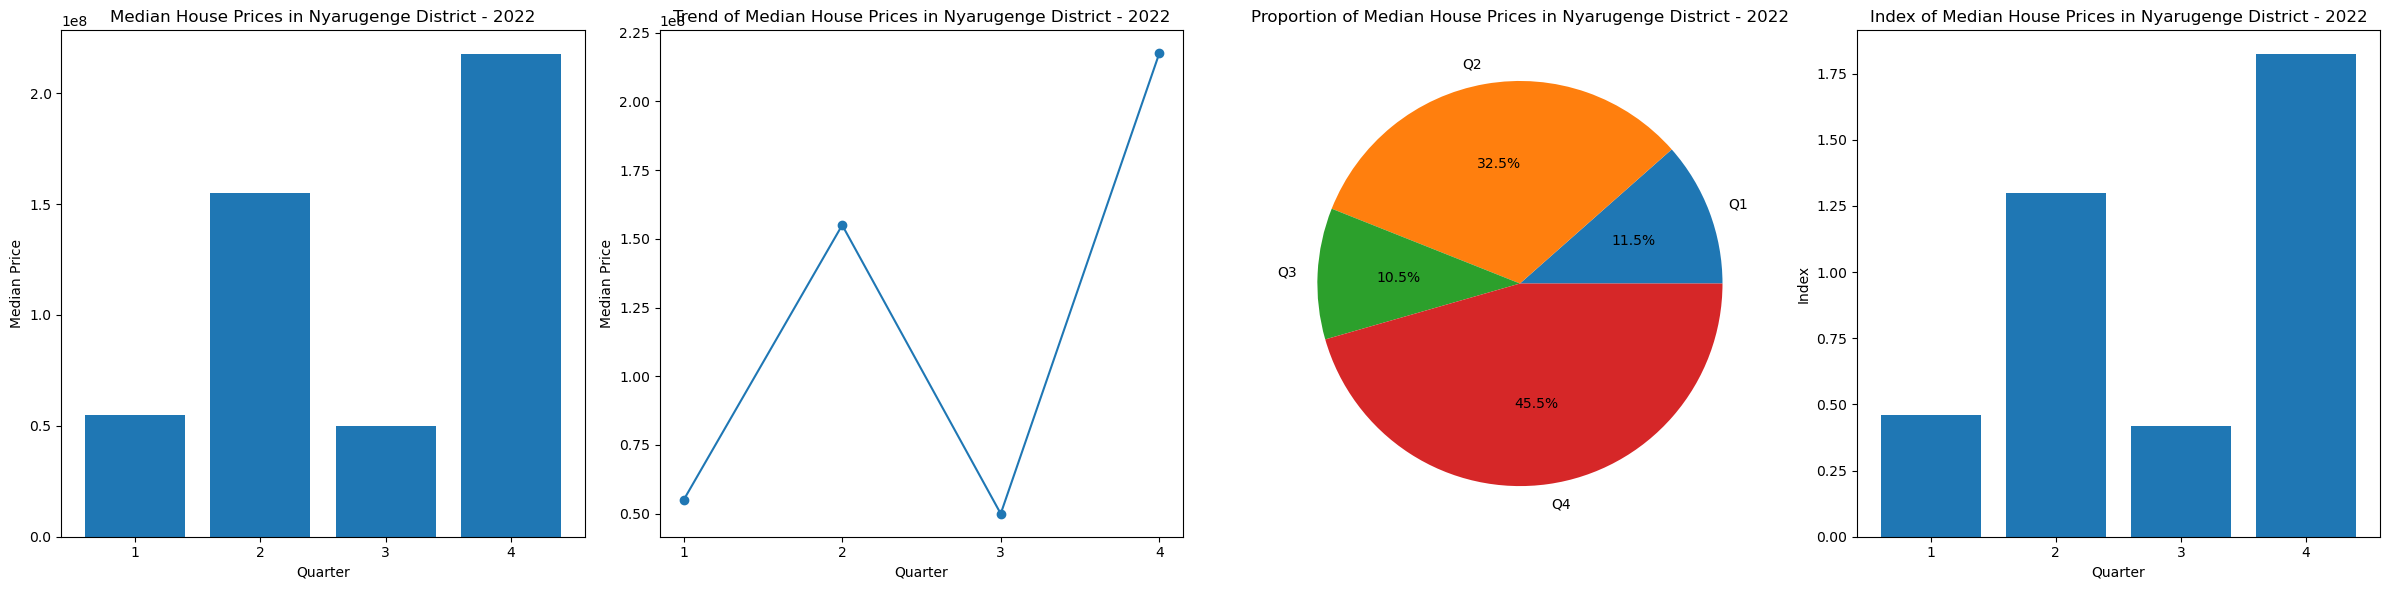

In [153]:
# Filter the data for Nyarugenge district in the year 2022
df_house = df_house.dropna(subset=['date'])
# filtered_nyarugenge = df_house[df_house['district'].str.contains('Nyarugenge') & df_house['date'].str.contains('2022')].copy()
filtered_nyarugenge = df_house[(df_house['district'] == 'nyarugenge') & (df_house['date'].dt.year == 2022)].copy()

# Extracting the quarter from the 'date' column and creating a new 'quarter' column
filtered_nyarugenge['quarter'] = filtered_nyarugenge['date'].dt.quarter

# Computing the number of houses in Nyarugenge
num_houses_nyarugenge = len(filtered_nyarugenge)
print("-" * 49, "\n Number of houses in Nyarugenge district - 2022:", num_houses_nyarugenge,
      "\n" + "-" * 49, "\n")


# Step 1: Computing the median prices for each quarter
nyarugenge_quarters_median_prices = filtered_nyarugenge.groupby('quarter')['price'].median()
# If there are quarters without houses, set the median price to 0
quarters_without_houses = set([1, 2, 3, 4]) - set(nyarugenge_quarters_median_prices.index)
for quarter in quarters_without_houses:
    nyarugenge_quarters_median_prices.loc[quarter] = 0
nyarugenge_quarters_median_prices = nyarugenge_quarters_median_prices.sort_index()
print("-"*49, "\n 2022 Median prices for each quarter in Nyarugenge: \n", nyarugenge_quarters_median_prices, 
      "\n" + "-"*49, "\n")

# Step 2: Computing the mean of the median prices
nyarugenge_mean_median_price = nyarugenge_quarters_median_prices.mean()
print("-"*49, "\n Mean of Median Prices in Nyarugenge:", nyarugenge_mean_median_price,
      "\n" + "-"*49, "\n")

# Step 3: Computing the index for each quarter
nyarugenge_index_by_quarter = nyarugenge_quarters_median_prices / nyarugenge_mean_median_price
print("-"*49, "\n Index for each quarter in Nyarugenge:\n", nyarugenge_index_by_quarter.to_string(float_format="%.4f"),
      "\n" + "-"*49, "\n")

# Step 4: Compute the sum of prices for houses in Nyarugenge
sum_prices_nyarugenge = filtered_nyarugenge['price'].sum()
print("-"*49, "\n Sum of prices in Nyarugenge district - 2022:", sum_prices_nyarugenge, 
      "\n" + "-"*49, "\n")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

# Plotting the median prices on a bar chart
ax1.bar(nyarugenge_quarters_median_prices.index, nyarugenge_quarters_median_prices.values)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Median Price')
ax1.set_title('Median House Prices in Nyarugenge District - 2022')
ax1.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Line graph for median prices in Nyarugenge district - 2022
ax2.plot(nyarugenge_quarters_median_prices.index, nyarugenge_quarters_median_prices.values, marker='o')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Median Price')
ax2.set_title('Trend of Median House Prices in Nyarugenge District - 2022')
ax2.set_xticks([1, 2, 3, 4])  # Assuming data contains all four quarters

# Pie chart to visualize the proportion of median prices for each quarter
ax3.pie(nyarugenge_quarters_median_prices.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%')
ax3.set_title('Proportion of Median House Prices in Nyarugenge District - 2022')

# Bar plot for the indices of median prices in Nyarugenge district - 2022
ax4.bar(nyarugenge_index_by_quarter.index, nyarugenge_index_by_quarter.values)
ax4.set_xlabel('Quarter')
ax4.set_ylabel('Index')
ax4.set_title('Index of Median House Prices in Nyarugenge District - 2022')
ax4.set_xticks([1, 2, 3, 4])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [50]:
## Total price for base period (2022)
Total_house_prices = sum_prices_gasabo + sum_prices_kicukiro + sum_prices_nyarugenge
print("-"*49, "\n Total price (Houses) - 2022:", Total_house_prices, 
      "\n" + "-"*49, "\n")

------------------------------------------------- 
 Total price (Houses) - 2022: 434580000000 
------------------------------------------------- 



### Computing House Weight by District

In [51]:
## District weight
house_weight_gasabo = sum_house_prices_gasabo / Total_house_prices
print("-"*49, "\n Gasabo's House Weight - 2022:", house_weight_gasabo, 
      "\n" + "-"*49, "\n")
house_weight_kicukiro = sum_house_prices_kicukiro / Total_house_prices
print("-"*49, "\n Kicukiro's House Weight - 2022:", house_weight_kicukiro, 
      "\n" + "-"*49, "\n")
house_weight_nyarugenge = sum_house_prices_nyarugenge / Total_house_prices
print("-"*49, "\n Nyarugenge's House Weight - 2022:", house_weight_nyarugenge, 
      "\n" + "-"*49, "\n")

------------------------------------------------- 
 Gasabo's House Weight - 2022: 0.9889905195821252 
------------------------------------------------- 

------------------------------------------------- 
 Kicukiro's House Weight - 2022: 0.005670992682590087 
------------------------------------------------- 

------------------------------------------------- 
 Nyarugenge's House Weight - 2022: 0.0053384877352846425 
------------------------------------------------- 



### Computing the aggregate indices for houses

In [52]:
# Step 5: Compute the aggregate indices

# Quarter 1
aggregate_index_q1 = gasabo_index_by_quarter[1] * house_weight_gasabo 
+ nyarugenge_index_by_quarter[1] * house_weight_nyarugenge
+ kicukiro_index_by_quarter[1] * house_weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n House Aggregate Index for quarter 1 =", aggregate_index_q1,"\n" + "-"*49,"\n")

# Quarter 2
aggregate_index_q2 = gasabo_index_by_quarter[2] * house_weight_gasabo 
+ nyarugenge_index_by_quarter[2] * house_weight_nyarugenge
+ kicukiro_index_by_quarter[2] * house_weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n House Aggregate Index for quarter 2 =", aggregate_index_q2,"\n" + "-"*49,"\n")

# Quarter 3
aggregate_index_q3 = gasabo_index_by_quarter[3] * house_weight_gasabo 
+ nyarugenge_index_by_quarter[3] * house_weight_nyarugenge
+ kicukiro_index_by_quarter[3] * house_weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n House Aggregate Index for quarter 3 =", aggregate_index_q3,"\n" + "-"*49,"\n")

# Quarter 4
aggregate_index_q4 = gasabo_index_by_quarter[4] * house_weight_gasabo 
+ nyarugenge_index_by_quarter[4] * house_weight_nyarugenge
+ kicukiro_index_by_quarter[4] * house_weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n House Aggregate Index for quarter 4 =", aggregate_index_q4,"\n" + "-"*49)

------------------------------------------------- 
 House Aggregate Index for quarter 1 = 0.8966847377544602 
------------------------------------------------- 

------------------------------------------------- 
 House Aggregate Index for quarter 2 = 1.0021770598432203 
------------------------------------------------- 

------------------------------------------------- 
 House Aggregate Index for quarter 3 = 1.0021770598432203 
------------------------------------------------- 

------------------------------------------------- 
 House Aggregate Index for quarter 4 = 1.0549232208876003 
-------------------------------------------------


In [147]:
## Total price for base period (2022)
Total_prices_apart = sum_prices_gasabo + sum_prices_kicukiro + sum_prices_nyarugenge
print("-"*49, "\n Total APartment price - 2022:", Total_prices_apart, 
      "\n" + "-"*49, "\n")

------------------------------------------------- 
 Total price - 2022: 678533889906 
------------------------------------------------- 



In [148]:
## District weight

apart_weight_gasabo = sum_apart_prices_gasabo / Total_prices_apart
print("-"*49, "\n Weight of Gasabo - 2022:", apart_weight_gasabo, 
      "\n" + "-"*49, "\n")
apart_weight_kicukiro = sum_apart_prices_kicukiro / Total_prices_apart
print("-"*49, "\n Weight of Kicukiro - 2022:", apart_weight_kicukiro, 
      "\n" + "-"*49, "\n")
apart_weight_nyarugenge = sum_apart_prices_nyarugenge / Total_prices_apart
print("-"*49, "\n Weight of Nyarugenge - 2022:", apart_weight_nyarugenge, 
      "\n" + "-"*49, "\n")

------------------------------------------------- 
 Weight of Gasabo - 2022: 0.6334178828702886 
------------------------------------------------- 

------------------------------------------------- 
 Weight of Kicukiro - 2022: 0.35449723806621175 
------------------------------------------------- 

------------------------------------------------- 
 Weight of Nyarugenge - 2022: 0.012084879063499657 
------------------------------------------------- 



#### Computing the aggregate indices

In [149]:
# Step 5: Compute the aggregate indices

# Quarter 1
aggregate_index_q1 = gasabo_index_by_quarter[1] * weight_gasabo 
+ nyarugenge_index_by_quarter[1] * weight_nyarugenge
+ kicukiro_index_by_quarter[1] * weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n Aggregate Index for quarter 1 =", aggregate_index_q1,"\n" + "-"*49,"\n")

# Quarter 2
aggregate_index_q2 = gasabo_index_by_quarter[2] * weight_gasabo 
+ nyarugenge_index_by_quarter[2] * weight_nyarugenge
+ kicukiro_index_by_quarter[2] * weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n Aggregate Index for quarter 2 =", aggregate_index_q2,"\n" + "-"*49,"\n")

# Quarter 3
aggregate_index_q3 = gasabo_index_by_quarter[3] * weight_gasabo 
+ nyarugenge_index_by_quarter[3] * weight_nyarugenge
+ kicukiro_index_by_quarter[3] * weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n Aggregate Index for quarter 3 =", aggregate_index_q3,"\n" + "-"*49,"\n")

# Quarter 4
aggregate_index_q4 = gasabo_index_by_quarter[4] * weight_gasabo 
+ nyarugenge_index_by_quarter[4] * weight_nyarugenge
+ kicukiro_index_by_quarter[4] * weight_kicukiro
# Step 14: Print the aggregate index for each quarter
print("-"*49, "\n Aggregate Index for quarter 4 =", aggregate_index_q4,"\n" + "-"*49)

------------------------------------------------- 
 Aggregate Index for quarter 1 = 0.5742988804690616 
------------------------------------------------- 

------------------------------------------------- 
 Aggregate Index for quarter 2 = 0.6418634546418924 
------------------------------------------------- 

------------------------------------------------- 
 Aggregate Index for quarter 3 = 0.6418634546418924 
------------------------------------------------- 

------------------------------------------------- 
 Aggregate Index for quarter 4 = 0.6756457417283078 
-------------------------------------------------


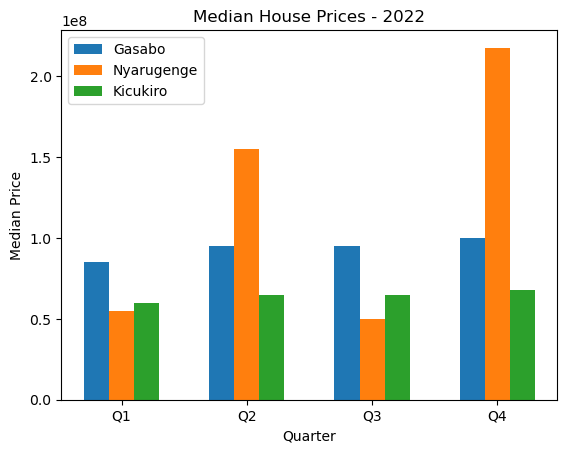

In [150]:
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.2

# Plotting the median prices for each district on the same axes
ax.bar(gasabo_quarters_median_prices.index, gasabo_quarters_median_prices.values, width=bar_width, label='Gasabo')
ax.bar(nyarugenge_quarters_median_prices.index + bar_width, nyarugenge_quarters_median_prices.values, width=bar_width, label='Nyarugenge')
ax.bar(kicukiro_quarters_median_prices.index + 2*bar_width, kicukiro_quarters_median_prices.values, width=bar_width, label='Kicukiro')

# Set labels, title, and ticks
ax.set_xlabel('Quarter')
ax.set_ylabel('Median Price')
ax.set_title('Median House Prices - 2022')
ax.set_xticks(gasabo_quarters_median_prices.index + bar_width)
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

# Add a legend to differentiate the districts
ax.legend()

# Show the combined bar chart
plt.show()

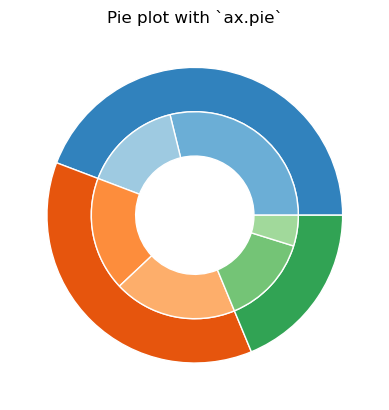

In [48]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [50]:
gasabo_prop_total = num_apart_gasabo + num_houses_gasabo
print("-" * 49, "\n Total properties in Gasabo district - 2022:", gasabo_prop_total,
      "\n" + "-" * 49, "\n")

------------------------------------------------- 
 Total properties in Gasabo district - 2022: 3470 
------------------------------------------------- 



In [30]:
## Property weight

Total_prices_propert = sum_prices_apart + sum_prices_house
weight_apart = sum_prices_apart / Total_prices_propert
print("-"*49, "\n Weight of Apartments - 2022:", weight_apart, 
      "\n" + "-"*49, "\n")
weight_house = sum_prices_house / Total_prices_propert
print("-"*49, "\n Weight of Houses - 2022:", weight_house, 
      "\n" + "-"*49, "\n")

------------------------------------------------- 
 Weight of Apartments - 2022: 0.019498148288958232 
------------------------------------------------- 

------------------------------------------------- 
 Weight of Houses - 2022: 0.9805018517110418 
------------------------------------------------- 



In [31]:
# Step 5: Compute the aggregate indices

# Quarter 1
property_aggregate_index_q1 = apart_index_by_quarter[1] * weight_apart 
+ house_index_by_quarter[1] * weight_house
print("-"*49, "\n Property Aggregate Index for quarter 1 =", property_aggregate_index_q1,"\n" + "-"*49,"\n")

# Quarter 2
property_aggregate_index_q2 = apart_index_by_quarter[2] * weight_apart 
+ house_index_by_quarter[2] * weight_house
print("-"*49, "\n Property Aggregate Index for quarter 2 =", property_aggregate_index_q2,"\n" + "-"*49,"\n")

# Quarter 3
property_aggregate_index_q3 = apart_index_by_quarter[3] * weight_apart 
+ house_index_by_quarter[3] * weight_house
print("-"*49, "\n Property Aggregate Index for quarter 3 =", property_aggregate_index_q3,"\n" + "-"*49,"\n")

# Quarter 4
property_aggregate_index_q4 = apart_index_by_quarter[4] * weight_apart 
+ house_index_by_quarter[4] * weight_house
print("-"*49, "\n Property Aggregate Index for quarter 4 =", property_aggregate_index_q4,"\n" + "-"*49,"\n")

------------------------------------------------- 
 Property Aggregate Index for quarter 1 = 0.026416846068911152 
------------------------------------------------- 

------------------------------------------------- 
 Property Aggregate Index for quarter 2 = 0.0364804064761154 
------------------------------------------------- 

------------------------------------------------- 
 Property Aggregate Index for quarter 3 = 0.0037738351527015932 
------------------------------------------------- 

------------------------------------------------- 
 Property Aggregate Index for quarter 4 = 0.01132150545810478 
------------------------------------------------- 

